In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
path_coverage = 'tme_data/sets/v2_maze_2/coverage'
path_distances = 'tme_data/sets/v2_maze_2/distances'

In [3]:
os.chdir(path_coverage)

In [4]:
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        return f.read()

In [5]:
matrix_greedy = []
matrix_minPos = []
matrix_combined = []
matrix_nearest = []
for file in os.listdir():
    if file.endswith('.txt'):
        file_path =  f"{file}"
        if('greedy' in file_path):
            matrix_greedy.append(np.loadtxt(file_path))
        if('minPos' in file_path):
            matrix_minPos.append(np.loadtxt(file_path))
        if('combined' in file_path):
            matrix_combined.append(np.loadtxt(file_path))
        if('nearest' in file_path):
            matrix_nearest.append(np.loadtxt(file_path))

In [6]:
np_matrix_greedy = np.array(matrix_greedy)
np_matrix_minPos = np.array(matrix_minPos)
np_matrix_combined = np.array(matrix_combined)
np_matrix_nearest = np.array(matrix_nearest)
print(np_matrix_greedy.shape)
print(np_matrix_minPos.shape)
print(np_matrix_combined.shape)
print(np_matrix_nearest.shape)

(30,)
(27,)
(20,)
(29,)


In [7]:
def neg_eighty_check(matrix):
    result = True
    if(matrix.shape[0] == 80):
        result = False
    return result

In [8]:
def eighty_build(matrix):
    result = matrix
    if (neg_eighty_check(matrix)):
        number = 80-matrix.shape[0]
        temp_2 = np.full(number, matrix[-1])
        result = np.insert(result, -1, temp_2)
    return result

In [9]:
def matrix_builder(matrix):
    temp = []
    for i in range(80):
        temp.append(i*5)
    result = np.array(temp)
    result = eighty_build(matrix[0][:, 1])
    result = np.append(temp, result)
    result = result.reshape((80,2))
    for i in range(len(matrix) - 1):
        temp = matrix[i+1][:, 1]
        temp = eighty_build(temp)
        if (temp[-1] > 0.95):
            result = np.insert(result, -1, temp, axis=1)
            #result = np.append(result, temp, axis=1)
    return result

In [10]:
nearest_plottable = matrix_builder(np_matrix_nearest[1:])
greedy_plottable = matrix_builder(np_matrix_greedy[1:])
minPos_plottable = matrix_builder(np_matrix_minPos[1:])
combined_plottable = matrix_builder(np_matrix_combined[1:])

In [14]:
print(nearest_plottable.shape)
print(greedy_plottable.shape)
print(minPos_plottable.shape)
print(combined_plottable.shape)

(80, 13)
(80, 18)
(80, 17)
(80, 17)


In [15]:
nearest_mean = np.mean(nearest_plottable[:,1:-1], axis=1)
greedy_mean = np.mean(greedy_plottable[:,1:-1], axis=1)
minPos_mean = np.mean(minPos_plottable[:,1:-1], axis=1)
combined_mean = np.mean(combined_plottable[:,1:-1], axis=1)

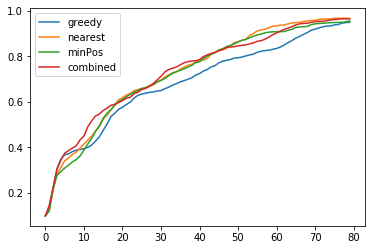

In [16]:
plt.plot(greedy_mean, label='greedy')
plt.plot(nearest_mean, label='nearest')
plt.plot(minPos_mean, label='minPos')
plt.plot(combined_mean, label='combined')
plt.legend()
plt.show()

TODO:
- mean-duration
- mean-discovery
- #runs
- distance measurements and their respective plots
  - distance traveled
  - distribution between robots
    - distance
    - #frontiers
- do all this for more robots